In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-28 14:43.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

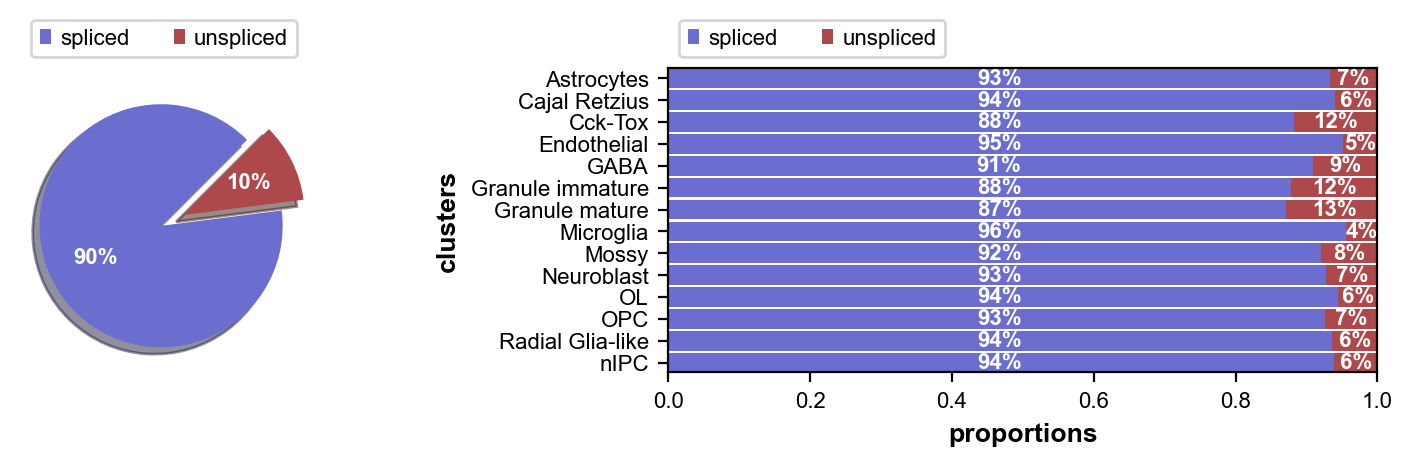

In [4]:
scv.pl.proportions(adata)

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=3000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 176 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [8]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/8 cores)


  0%|          | 0/901 [00:00<?, ?gene/s]

    finished (0:09:28) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [9]:
scv.tl.velocity(adata, mode="dynamical")

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [10]:
adata

AnnData object with n_obs × n_vars = 2930 × 1824
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_colors', 'pca', 'neighbors', 'recover_dynamics', 'velocity_params'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [11]:
gamma = adata.var['fit_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

index,Tcea1,Rb1cc1,Prex2,A830018L16Rik,Paqr8,Khdrbs2,Arhgef4,Unc50,Eif5b,Mrps9,...,Itm2a,Pcdh19,Tspan6,Bex2,Tceal5,Sms,Cnksr2,Zrsr2,Ofd1,Tmsb4x
index,,,,,,,,,,,,,,,,,,,,,
AAACATACCCATGA,NaN,NaN,-0.018358,-0.035798,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.054971,0.003490,NaN,0.049628,0.025812,NaN,NaN,-0.004405,NaN
AAACATACCGTAGT,NaN,NaN,-0.123067,0.000000,-0.042586,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.018875,NaN,0.012451,0.000000,NaN,NaN,0.000000,NaN
AAACATACGAGAGC,NaN,NaN,-0.019261,0.004057,-0.002854,NaN,NaN,NaN,NaN,NaN,...,NaN,0.025068,0.007663,NaN,0.045279,0.035376,NaN,NaN,0.004364,NaN
AAACATACTGAGGG,NaN,NaN,-0.017290,-0.036052,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.010547,0.011047,NaN,0.049806,0.073633,NaN,NaN,0.000000,NaN
AAACATTGGCATCA,NaN,NaN,-0.022499,-0.051644,-0.002677,NaN,NaN,NaN,NaN,NaN,...,NaN,0.055886,0.003552,NaN,0.096999,0.038874,NaN,NaN,0.001515,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTTCCCGT,NaN,NaN,-0.008537,-0.023714,0.000255,NaN,NaN,NaN,NaN,NaN,...,NaN,0.011103,0.006164,NaN,0.046119,0.070760,NaN,NaN,0.003477,NaN
TTTGACTGCCTGTC,NaN,NaN,-0.017018,-0.007714,-0.006414,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.010091,NaN,0.027084,0.042418,NaN,NaN,0.003889,NaN
TTTGACTGTCTGGA,NaN,NaN,-0.017669,-0.035719,-0.005150,NaN,NaN,NaN,NaN,NaN,...,NaN,0.039670,0.003069,NaN,0.117940,0.082601,NaN,NaN,-0.006503,NaN


In [12]:
gamma

index
Tcea1                 NaN
Rb1cc1                NaN
Prex2            0.118553
A830018L16Rik    0.190680
Paqr8            0.112034
                   ...   
Sms              0.353151
Cnksr2                NaN
Zrsr2                 NaN
Ofd1             0.297756
Tmsb4x                NaN
Name: fit_gamma, Length: 1824, dtype: float64

In [13]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:16) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


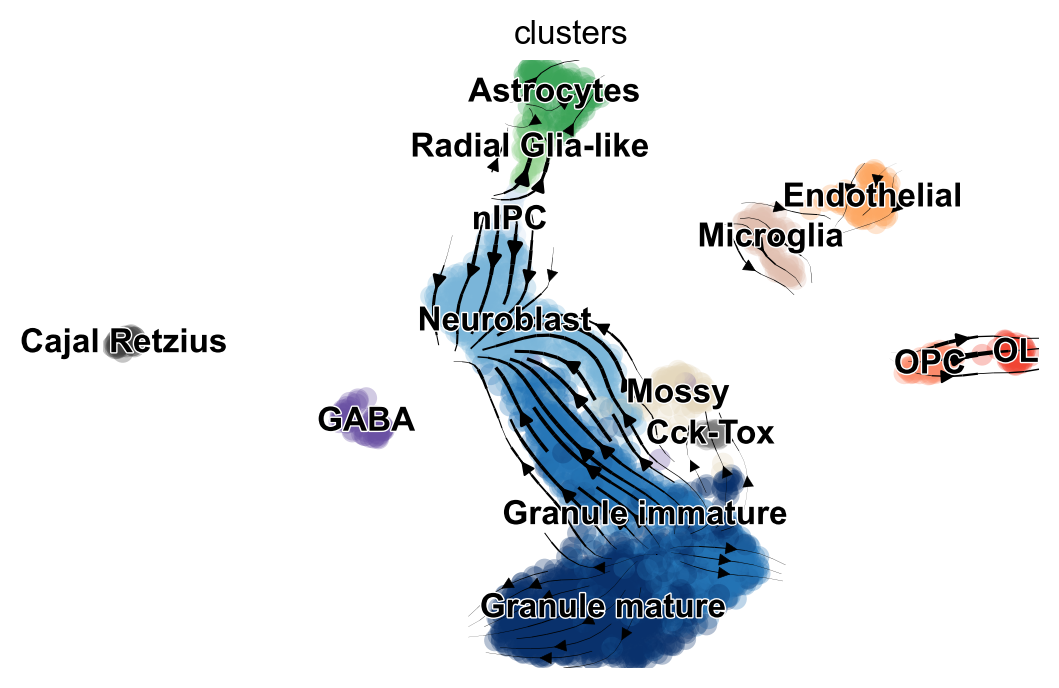

In [14]:
mc.acc_embedding_stream(adata,basis='umap')

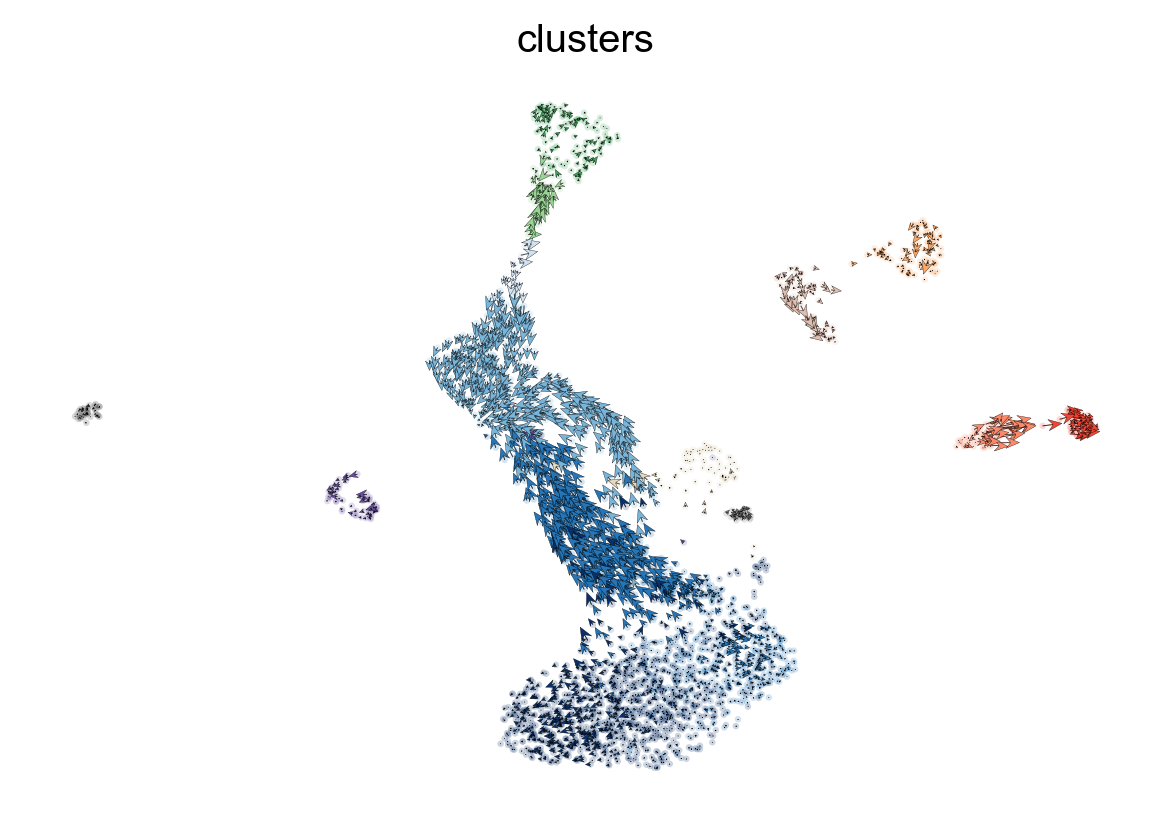

In [15]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

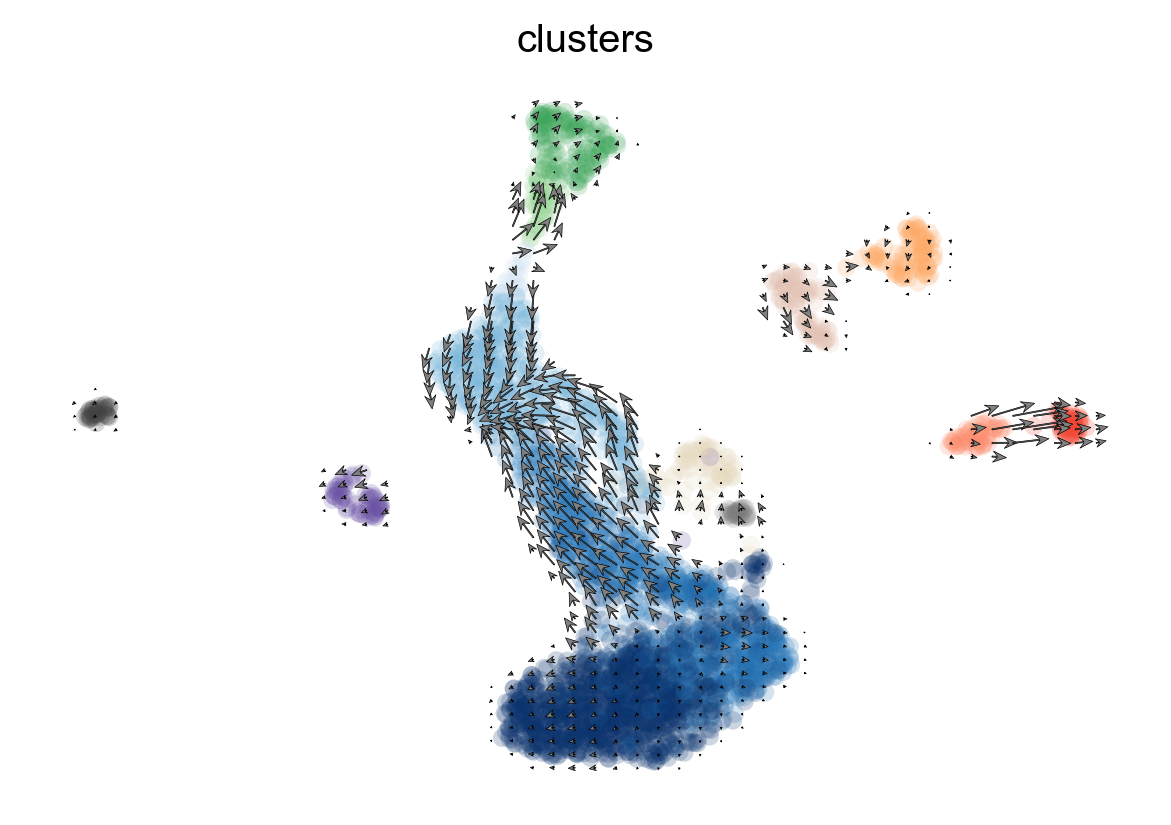

In [16]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

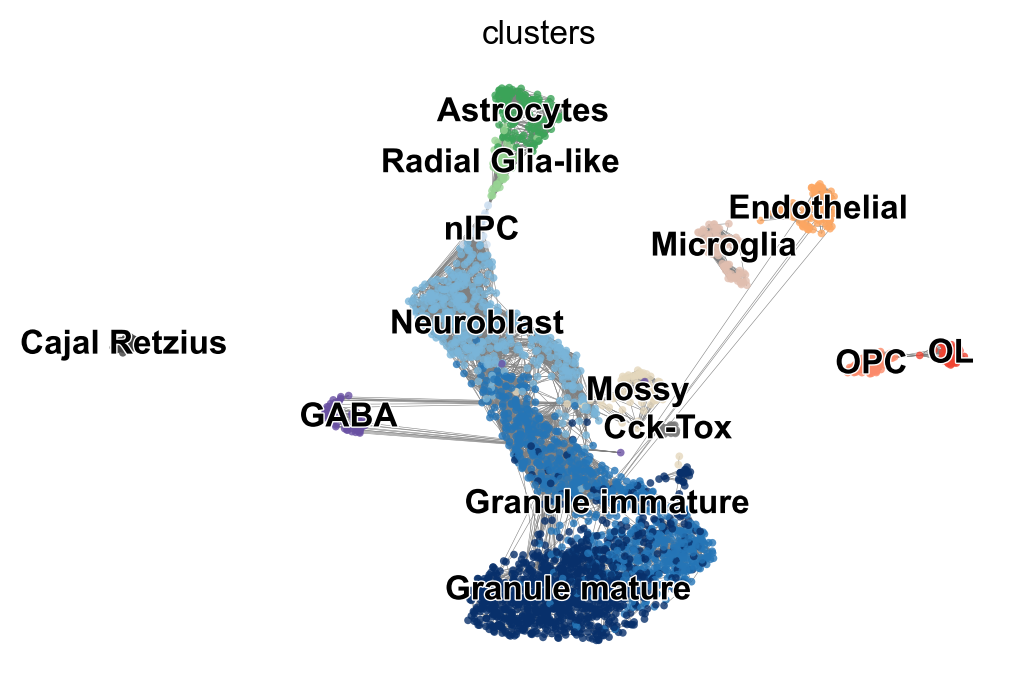

In [17]:
mc.acc_graph(adata)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


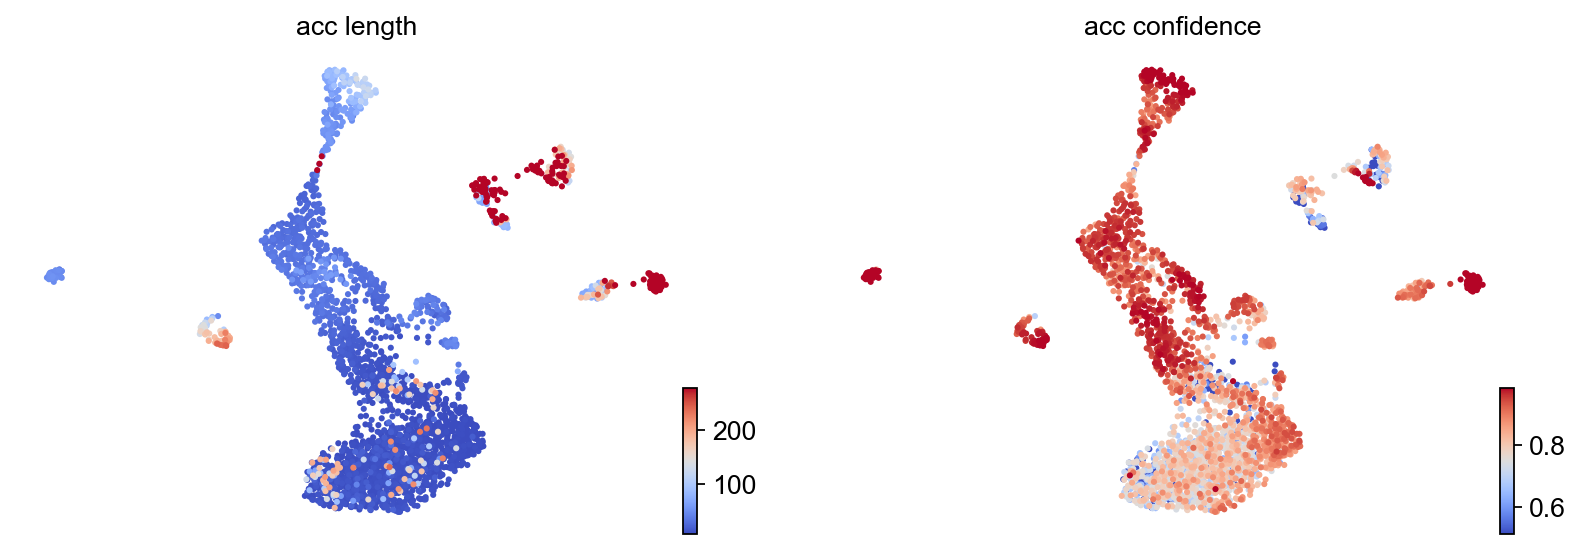

In [18]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

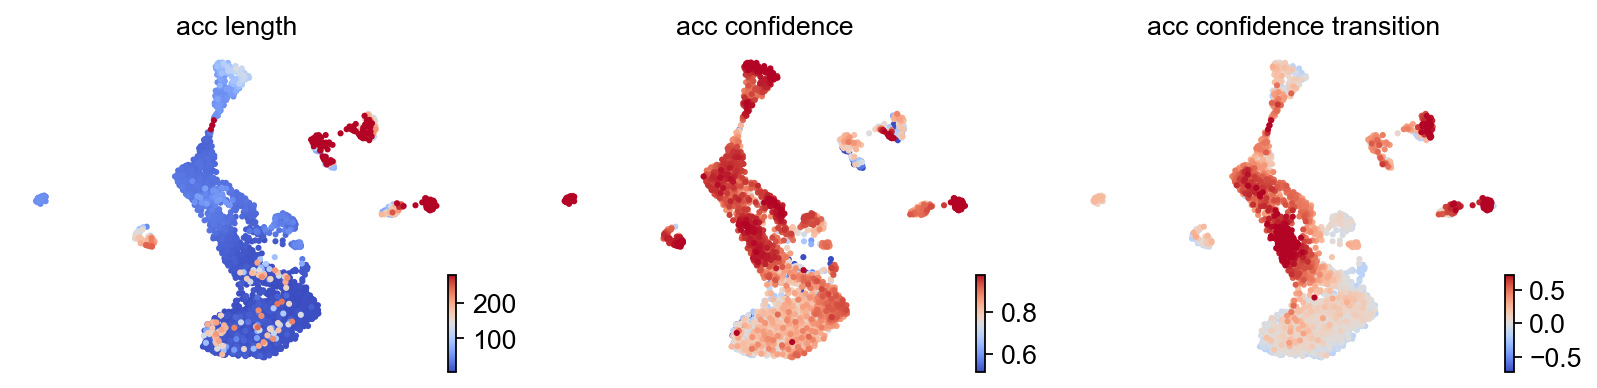

In [19]:
keys = 'acc_length', 'acc_confidence', 'acc_confidence_transition'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

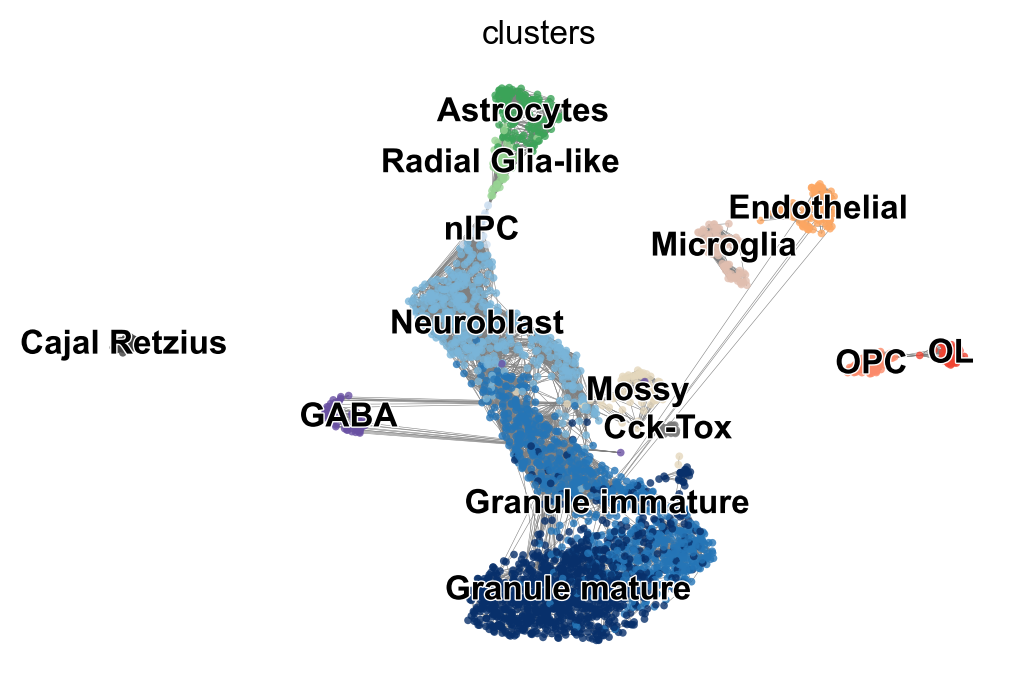

In [20]:
mc.acc_graph(adata)

In [21]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [22]:
mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 4 regions of root cells and 4 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


,Astrocytes,Cajal Retzius,Cck-Tox,Endothelial,GABA,Granule immature,Granule mature,Microglia,Mossy,Neuroblast,OL,OPC,Radial Glia-like,nIPC
Astrocytes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cajal Retzius,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cck-Tox,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GABA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Granule immature,0,0,0,0,0,0,0,0,0,0.024,0,0,0,0
Granule mature,0,0,0,0,0,0.13,0,0,0,0,0,0,0,0
Microglia,0,0,0,0.011,0,0,0,0,0,0,0,0,0,0
Mossy,0,0,0,0,0.037,0,0,0,0,0.036,0,0,0,0
Neuroblast,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


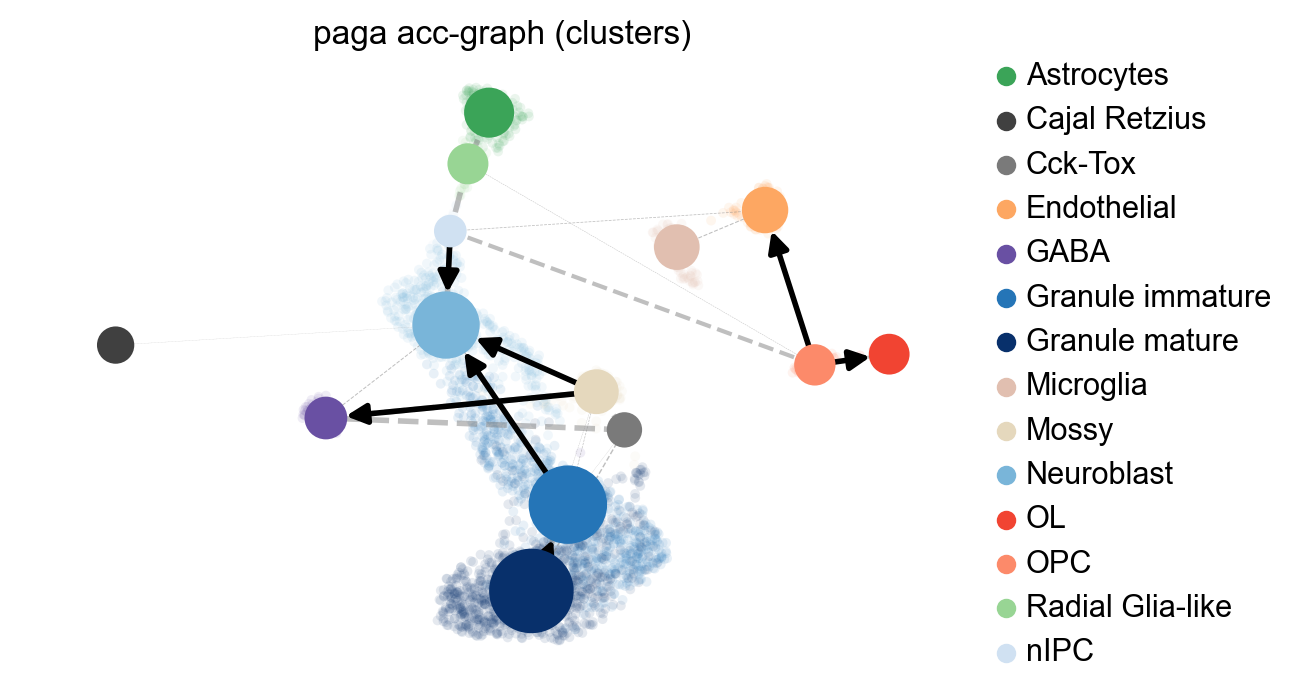

In [23]:
mc.paga(adata, basis='umap', size=50, alpha=.1, min_edge_width=2, node_size_scale=1.5)